In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

(coin-toss)=
# Experiment with "Randomness"

In this hands-on, we will experiment with the concept of randomness.
We will use the coin toss experiment as a running example.

## The coin toss experiment
Let $X$ be the variable describing the result of the coin toss experiment.
We will use the following notation:
+ $X=H$ if the coin toss results in heads.
+ $X=T$ if the coin toss results in tails.

Using dynamics and kinematics, one can show that the result of a coin toss depends on the initial conditions.
In particular, the result of a coin toss depends on the initial velocity $v_0$ and the coin's initial angular velocity $\omega_0$.
If we idealize the coin as a rod restricted on a plane, we can write the following formula:

$$
X = 
\begin{cases}
T,&\;\text{if}\;\frac{2v_0\omega_0}{g} (\text{mod}\;2\pi) \in \left(\frac{\pi}{2},\frac{3\pi}{2}\right),\\
H,&\;\text{otherwise}.
\end{cases}
$$

The corresponding causal graph is:

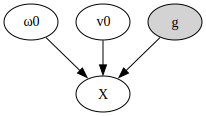

In [7]:
from graphviz import Digraph
gct = Digraph("coin_toss_g")
gct.node("omega0", label="<&omega;<sub>0</sub>>")
gct.node("v0", label="<v<sub>0</sub>>")
gct.node("g", style="filled")
gct.node("X")
gct.edge("g", "X")
gct.edge("v0", "X")
gct.edge("omega0", "X")
gct.render("coin_toss_g", format="png")
gct

A typical human throws the coin with

$$
v_0 \approx 2.5\;\text{m/s},
$$

and

$$
\omega_0 \approx 200\times 2\pi\;\text{rad/s}.
$$

Let us simulate how sensitive is the result on the choice of these parameters.

Here is the code the implements the model:

In [8]:
# Get the acceleration of gravity from the scipy module
from scipy.constants import g 
import numpy as np

def X(v0, omega0):
    """Returns the result of a coin toss given initial conditions.
    
    Arguments:
    v0     -- The initial velocity
    omega0 -- The initial angular velocty.
    """
    tmp = (2 * v0 * omega0 / g) % (2. * np.pi) 
    if tmp > 0.5 * np.pi and tmp < 1.5 * np.pi:
        return "T"
    return "H"

Try it out here:

In [9]:
v0 = 2.5
omega0 = 200 * 2. * np.pi
print(X(v0, omega0))

H


### Questions

+ Play with the code above changing $v_0$ and $\omega_0$. Observe that they change the result of the coin toss experiment. To which of the two parameters is the result of the coin toss most sensitive? 

+ Consider a coin tossing experiment in the moon. Would it be easier or harder to manipulate the result?
```{admonition} Hint
:class: dropdown
Look up the acceleration of gravity for the moon, and change the value of ``g`` in the definition of the function ``X``.
```

## Uncertainty in the initial conditions causes uncertainty in the result of the coin toss experiment

Let us suppose that a typical human throws the coin with an initial velocity:

$$
v_0 = 2.5 \pm 0.2\;\text{m/s},
$$

and an initial angular velocity of

$$
\omega_0 = 400\pi \pm 50\;\text{rad/s}.
$$

For the time being let's interpret the $\pm$ as if it means that all values plus or minus that value are equally likely.

Let us now repeat the experiment 1,000 times and that each time the we draw the initial conditions randomly.
We are going to count the number of times we get heads.
Dividing by the total number of random experiments, we will get the frequency of heads.
The code is given below.

In [10]:
def measure_freq_of_H(
    v_0_lower=2.3,
    v_0_upper=2.7, 
    omega_0_lower=400*np.pi-50, 
    omega_0_upper=400*np.pi+50,
    N=10000
):
    """Repeat an coin toss experiment a given number of times
    and return the frequency of heads.
    
    Keyword Arguments:
    v_0_lower     --  Lower bound for initial velocity
                      (default = 2.3 m / s)
    v_0_upper     --  Upper bound for initial velocity
                      (default = 2.7 m / s)
    omega_0_lower --  Lower bound for initial angular
                      velocity (default = 400 * pi - 50 rad / s)
    omega_0_upper --  Upper bound for initial angular velocity 
                      (default = 400 * pi + 50 rad / s)
    N             --  The number of experiments to simulate
                      (default = 10000)
    """
    # Counts the number of H's
    num_Hs = 0
    for n in range(N):
        # Randomly generate initial velocity
        v_0 = np.random.rand() * (v_0_upper - v_0_lower) + v_0_lower
        # Randomly generate initial angular velocity
        omega_0 = (np.random.rand() 
                   * (omega_0_upper - omega_0_lower) 
                   + omega_0_lower)
        # Add to the counter only if the result is an H
        num_Hs += 1 if X(v_0, omega_0) == 'H' else 0
    return num_Hs / N

Let us run this code:

In [11]:
measure_freq_of_H(N=100)

0.5

This is our first Monte Carlo simulation. As we will see in a few lectures, the empirical frequency that we measure this way converges to the probability of the coin turning out heads in the limit of $N\rightarrow\infty$.
This is known as the *law of large numbers* and we will learn about it in Lecture 8.

### Questions

+ Run ``measure_freq_of_H()`` two or three times. What do you observe? 
+ In the previous question, you observed a form of epistemic uncertainty on the value of the frequency that stems from the fact you are using too few samples to estimate it. Increase the number of experiments $N$ until you frequency of H's starts to converge. We will learn about this uncertainty and how to dies of as you increase $N$ when we talk about the central limit theorem.